https://github.com/BuzzFeedNews/H-2-certification-data#standardized-data

https://slack-files.com/files-pri-safe/T0G8RC23F-F1CDXGV2T/weeklychallenge1.pdf?c=1464995869-6ff0f6b3f6e525238c72eb64113afaa16cfd2b31

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [44]:
h2visas_df = pd.read_csv(".\\datasets\\H-2-certification-decisions.csv")
h2visas_df.shape

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (0,8,9,14,15,16,17,18,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(213155, 22)

In [45]:
h2visas_df.columns

Index(['case_no', 'visa_type', 'fy', 'last_event_date', 'case_status',
       'n_requested', 'n_certified', 'is_certified',
       'certification_begin_date', 'certification_end_date', 'job_title',
       'employer_name', 'employer_state', 'employer_city',
       'employer_address_1', 'employer_address_2', 'employer_postal_code',
       'worksite_state', 'worksite_city', 'agent_name', 'organization_flag',
       'is_duplicate'],
      dtype='object')

In [46]:
h2visas_df.head()

,case_no,visa_type,fy,last_event_date,case_status,n_requested,n_certified,is_certified,certification_begin_date,certification_end_date,...,employer_state,employer_city,employer_address_1,employer_address_2,employer_postal_code,worksite_state,worksite_city,agent_name,organization_flag,is_duplicate
0,9455254,H-2B,2000,1999-10-01,"DENIED, TEMPORARY",1.0,0,False,NaN,NaN,...,CA,LOS ANGELES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8222219,H-2B,2000,1999-10-04,"CERTIFIED, TEMPORARY",2.0,2,True,NaN,NaN,...,CO,BEAVER CREEK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8222168,H-2B,2000,1999-10-04,"CERTIFIED, TEMPORARY",2.0,2,True,NaN,NaN,...,CO,MT. CRESTED BUTTE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8222169,H-2B,2000,1999-10-04,"CERTIFIED, TEMPORARY",5.0,5,True,NaN,NaN,...,CO,MT. CRESTED BUTTE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8222170,H-2B,2000,1999-10-04,"CERTIFIED, TEMPORARY",40.0,40,True,NaN,NaN,...,CO,MT. CRESTED BUTTE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
h2visas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213155 entries, 0 to 213154
Data columns (total 22 columns):
case_no                     213155 non-null object
visa_type                   213155 non-null object
fy                          213155 non-null int64
last_event_date             205686 non-null object
case_status                 213155 non-null object
n_requested                 141512 non-null float64
n_certified                 213155 non-null int64
is_certified                213155 non-null bool
certification_begin_date    155351 non-null object
certification_end_date      155342 non-null object
job_title                   212671 non-null object
employer_name               213133 non-null object
employer_state              213029 non-null object
employer_city               213076 non-null object
employer_address_1          169205 non-null object
employer_address_2          21596 non-null object
employer_postal_code        168879 non-null object
worksite_state            

In [72]:
h2visas_df.isnull().sum()

case_no                          0
visa_type                        0
fy                               0
last_event_date               7469
case_status                      0
n_requested                  71643
n_certified                      0
is_certified                     0
certification_begin_date     57804
certification_end_date       57813
job_title                      484
employer_name                   22
employer_state                 126
employer_city                   79
employer_address_1           43950
employer_address_2          191559
employer_postal_code         44276
worksite_state               63071
worksite_city               131175
agent_name                   57221
organization_flag           166033
is_duplicate                137871
dtype: int64

In [50]:
# visa_type
h2visas_df["visa_type"].value_counts()

H-2B    122662
H-2A     90493
Name: visa_type, dtype: int64

In [55]:
# last_event_date
h2visas_df["last_event_date"].head()

0    1999-10-01
1    1999-10-04
2    1999-10-04
3    1999-10-04
4    1999-10-04
Name: last_event_date, dtype: object

In [56]:
#case_status
h2visas_df["case_status"].value_counts()

CERTIFIED - FULL                                        57044
CERTIFIED                                               42671
CERTIFIED, TEMPORARY                                    36788
DETERMINATION ISSUED - CERTIFICATION                    18977
CERTIFICATION                                           17195
DENIED                                                  13684
PARTIAL CERTIFIED                                        8514
DENIED, TEMPORARY                                        5817
WITHDRAWN                                                3189
CERTIFIED - PARTIAL                                      3120
PARTIAL CERTIFICATION                                    2089
RECEIVED REGIONAL OFFICE                                  980
DETERMINATION ISSUED - CERTIFICATION EXPIRED              954
DETERMINATION ISSUED - DENIED                             366
CERTIFICATION EXPIRED                                     355
DETERMINATION ISSUED - WITHDRAWN                          346
INCOMPLE

In [57]:
#case_status
h2visas_df["is_certified"].value_counts()

True     186209
False     26946
Name: is_certified, dtype: int64

In [58]:
h2visas_df["case_status"][h2visas_df["is_certified"] == True].value_counts()

CERTIFIED - FULL                                        55301
CERTIFIED                                               42670
CERTIFIED, TEMPORARY                                    36786
DETERMINATION ISSUED - CERTIFICATION                    18896
CERTIFICATION                                           17160
PARTIAL CERTIFIED                                        8514
CERTIFIED - PARTIAL                                      3059
PARTIAL CERTIFICATION                                    2089
DETERMINATION ISSUED - CERTIFICATION EXPIRED              948
CERTIFICATION EXPIRED                                     355
DETERMINATION ISSUED - PARTIAL CERTIFICATION              306
PARTIAL CERTIFICATION EXPIRED                              84
DETERMINATION ISSUED - PARTIAL CERTIFICATION EXPIRED       41
Name: case_status, dtype: int64

In [59]:
h2visas_df["case_status"][h2visas_df["is_certified"] == False].value_counts()

DENIED                                          13684
DENIED, TEMPORARY                                5817
WITHDRAWN                                        3189
CERTIFIED - FULL                                 1743
RECEIVED REGIONAL OFFICE                          980
DETERMINATION ISSUED - DENIED                     366
DETERMINATION ISSUED - WITHDRAWN                  346
INCOMPLETE                                        320
RECEIVED                                          110
DETERMINATION ISSUED - CERTIFICATION               81
CERTIFIED - PARTIAL                                61
REMAND TO SWA                                      55
REMAND ISSUED TO EMPLOYER                          53
MODIFICATION                                       48
CERTIFICATION                                      35
REMAND ISSUED TO STATE                             33
DETERMINATION ISSUED - CERTIFICATION EXPIRED        6
REDUCTION IN RECRUITMENT DENIED                     4
FINAL REVIEW                

In [69]:
h2visas_df.n_requested.describe()

C:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


count    141512.000000
mean         18.916516
std          42.546266
min           0.000000
25%                NaN
50%                NaN
75%                NaN
max        1866.000000
Name: n_requested, dtype: float64

C:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


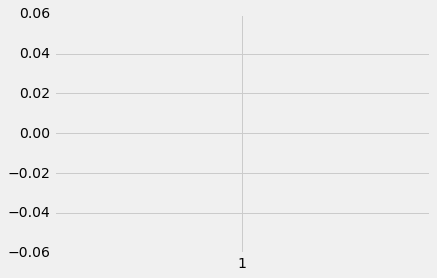

In [70]:
plt.boxplot(h2visas_df.n_requested,0, '')
plt.show()

In [73]:
h2visas_df.n_certified.describe()

count    213155.000000
mean         16.053646
std          39.135363
min           0.000000
25%           2.000000
50%           6.000000
75%          15.000000
max        1866.000000
Name: n_certified, dtype: float64

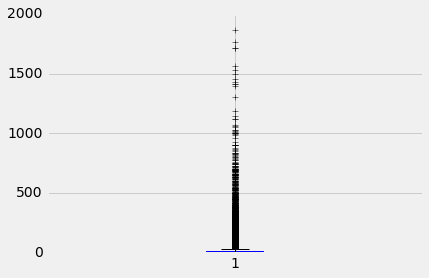

In [68]:
plt.boxplot(h2visas_df.n_certified)
plt.show()

In [75]:
# job_title
len(h2visas_df.job_title.value_counts())

8752

In [ ]:
# make certified, pending, denied column? understand the values
# fix is_certified